In [32]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np
from collections import defaultdict
from collections import Counter
import glob
import os
import itertools
sns.set_style("whitegrid")

In [33]:
uberdict = {}
form = (lambda L : [float(i) if x%3==2 else int(i) for x, i in enumerate(L)])
for filename in glob.glob("tracerx_lung/*.capped4.input.tsv"):
    stripped_name = os.path.basename(filename).rstrip(".capped4.input.tsv")
    uberdict[stripped_name] = defaultdict(lambda : defaultdict(lambda : dict()))
    snvs = uberdict[stripped_name]
    snvs_cluster
    with open(filename) as f:
        for l in (l for l in f if len(l) > 1 and '#' not in l):
            s = l.rstrip("\n").split("\t")
            char_idx = int(s[2])
            ref = int(s[4])
            var = int(s[5])
            sample_idx = int(s[0])
            cn_states = s[6:]
            
            snvs[char_idx][sample_idx]['cn_states'] = form(cn_states)
            snvs[char_idx][sample_idx]['var'] = var
            snvs[char_idx][sample_idx]['ref'] = ref
            snvs[char_idx][sample_idx]['vaf'] = float(var) / (var + ref)
            snvs[char_idx][sample_idx]['cn_state_set'] = set
            
    # cluster
    for snv in snvs:

    snvs = {cidx : {sidx : snvs[cidx][sidx] for sidx in snvs[cidx]} for cidx in snvs}

In [56]:
uberdict['CRUK0097'][0][0]

{'cn_states': [1, 1, 0.73, 2, 0, 0.27],
 'ref': 641,
 'vaf': 0.001557632398753894,
 'var': 1}

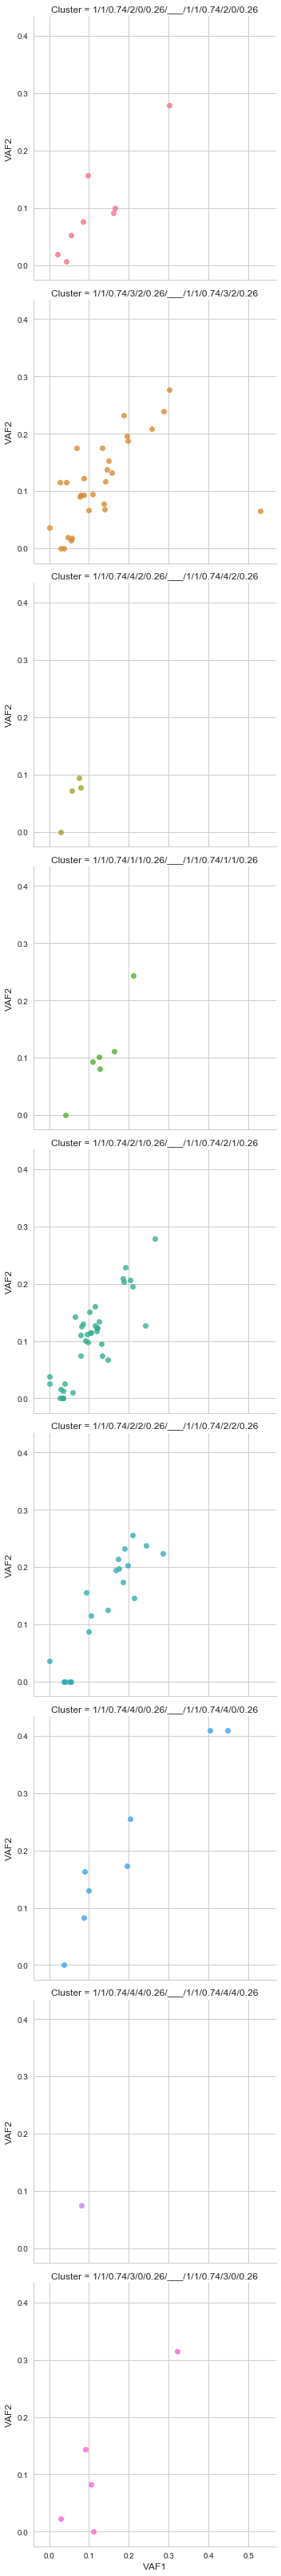

In [57]:
tmp = uberdict['CRUK0043']
form = (lambda c, p, q : '/'.join(map(str, tmp[c][p]['cn_states'] + ['___'] + tmp[c][p]['cn_states'])))
df = [{'SNV' : c, 'Sample1' : p, 'VAF1' : tmp[c][p]['vaf'], 'Sample2' : q, 'VAF2' : tmp[c][q]['vaf'], 'Cluster' : form(c, p, q)} for c in tmp for p, q in itertools.combinations(tmp[c], 2)]

data = pd.DataFrame(df)
data = data[(data['Sample1']==0)&(data['Sample2']==1)]
sns.lmplot(data=data, x='VAF1', y='VAF2', row='Cluster', hue='Cluster', fit_reg=False)


In [53]:
L = [(patient, len(uberdict[patient][0])) for patient in uberdict]
list(reversed(sorted(L, key=(lambda x : x[1]))))

[('CRUK0062', 7),
 ('CRUK0096', 7),
 ('CRUK0029', 6),
 ('CRUK0065', 6),
 ('CRUK0071', 6),
 ('CRUK0050', 5),
 ('CRUK0037', 5),
 ('CRUK0003', 5),
 ('CRUK0013', 5),
 ('CRUK0082', 5),
 ('CRUK0063', 5),
 ('CRUK0069', 5),
 ('CRUK0070', 5),
 ('CRUK0023', 4),
 ('CRUK0035', 4),
 ('CRUK0036', 4),
 ('CRUK0032', 4),
 ('CRUK0005', 4),
 ('CRUK0009', 4),
 ('CRUK0017', 4),
 ('CRUK0018', 4),
 ('CRUK0080', 4),
 ('CRUK0083', 4),
 ('CRUK0085', 4),
 ('CRUK0066', 4),
 ('CRUK0068', 4),
 ('CRUK0099', 4),
 ('CRUK000', 4),
 ('CRUK002', 4),
 ('CRUK009', 4),
 ('CRUK008', 4),
 ('CRUK0079', 4),
 ('CRUK0077', 4),
 ('CRUK0076', 4),
 ('CRUK0046', 4),
 ('CRUK0041', 4),
 ('CRUK0025', 3),
 ('CRUK0056', 3),
 ('CRUK0052', 3),
 ('CRUK0051', 3),
 ('CRUK0039', 3),
 ('CRUK0031', 3),
 ('CRUK0030', 3),
 ('CRUK0100', 3),
 ('CRUK0001', 3),
 ('CRUK0002', 3),
 ('CRUK0011', 3),
 ('CRUK0086', 3),
 ('CRUK0087', 3),
 ('CRUK0098', 3),
 ('CRUK0095', 3),
 ('CRUK003', 3),
 ('CRUK0078', 3),
 ('CRUK0072', 3),
 ('CRUK0048', 3),
 ('CRUK0028', 2